## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# Short definition about Airbnb
**Airbnb : -**   Airbnb is an online marketplace that connects 
people who want to rent out their homes with
people who are looking for accommodations in specific locales. Airbnb offers people an easy, relatively 
stress-free way to earn some income from their property.

#**Importing pyhton Libraries**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline


import seaborn as sns

#**Connecting to Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# path for python notebook in drive
root_path = 'gdrive/My Drive/EDA _Airbnb/' 

#Importing Dataset From Drive

In [ ]:
air_df = pd.read_csv(root_path+"Airbnb_NYC_2019.csv")


In [ ]:
# Head function used to get the first n rows of DataFrame
air_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Checking the shape of datset ( rows & columns)
print(f'The shape of Airbnb Dataset is {air_df.shape}')

The shape of Airbnb Dataset is (48895, 16)


In [ ]:
# columns function provide us the columns names of DataFrame
air_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#  categorical columns in Dataset
categorical_cols = air_df.select_dtypes(include = 'object').columns
print(f' The following are the categorical columns : {list(categorical_cols)}')

 The following are the categorical columns : ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [ ]:
# numeric/ non categorical columns in Dataset
numerical_cols = air_df.select_dtypes(exclude = 'object').columns
print(' The following are the non categorical features in the dataset:') 
list(numerical_cols)

 The following are the non categorical features in the dataset:


['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
# Tail function used to get the last n rows of DataFrame
air_df.tail(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
#The info() method prints information about the DataFrame
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame
air_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#**Handling Missing Values**

In [ ]:
# we can see null values for every columns
missing_values_count = np.sum(air_df.isnull())
missing_values_count


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We can see above ( last_review, reviews_per_month ) columns have most of the null values

In [ ]:
# Filling missing values
air_df['name'].fillna('Not_mapped', inplace = True)
air_df['host_name'].fillna('Not_mapped', inplace =  True)


In [ ]:
# Dropping the unncessary columns.
air_df = air_df.drop(['last_review','reviews_per_month'], axis =1)
air_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355


In [ ]:
# we can see null values for every columns
missing_values_count = np.sum(air_df.isnull())
missing_values_count


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

We can now we dont have any missing value in dataset

In [ ]:
total_cells = np.product(air_df.shape)
total_missing =  missing_values_count.sum()

#calculating the percentage of missing values
percentage_missing = np.round((total_missing / total_cells) * 100, 2)
print("Percentage of missing values in the dataset:", percentage_missing) 

Percentage of missing values in the dataset: 0.0


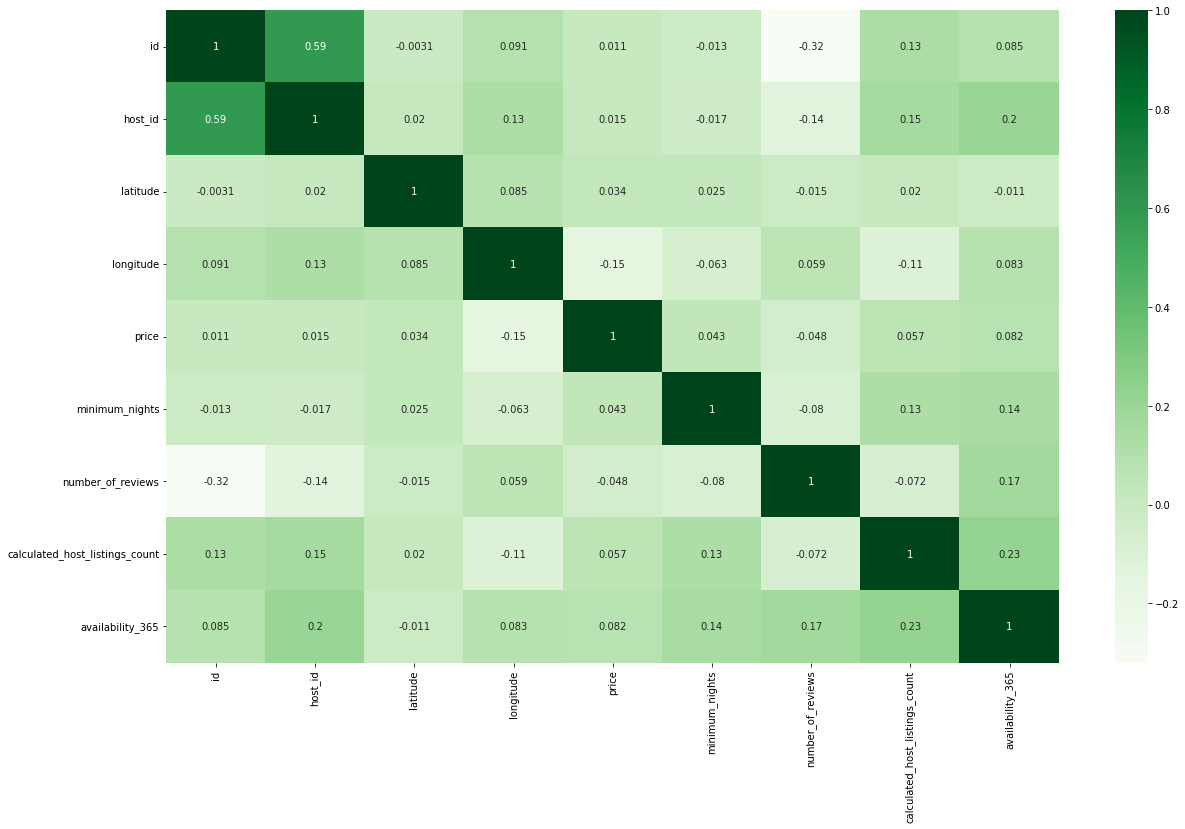

In [ ]:
#Viewing correlation of the numerical values
plt.figure(figsize=(20,12))
abnb_corr = air_df.corr()
_ = sns.heatmap(abnb_corr ,cbar=True,annot=True, cmap="Greens")

#Lets explore and analyze the data to discover key understandings  :

In [ ]:
# Creating back_up of Data_Set
air_df2=air_df

#**1.  What can we learn about different hosts and areas?**

In [ ]:
air_df2.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# grouping the data according to the categories
host_ar_rept = air_df2.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max()
# Reset index 
host_ar_rept=host_ar_rept.reset_index()
# sorting the values calculated_host_listings_count
host_ar_rept.sort_values(by='calculated_host_listings_count', ascending=False).head(5)


,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1833,Blueground,Brooklyn,232
1834,Blueground,Manhattan,232
7275,Kara,Manhattan,121
7478,Kazuya,Brooklyn,103


### Observation :From the above result, we can conclude that the name of the host with the most listings is **Sonder(NYC)** who has **327 listings** in **Manhattan**

In [ ]:
host_ar_rept

,host_name,neighbourhood_group,calculated_host_listings_count
0,'Cil,Queens,1
1,(Ari) HENRY LEE,Manhattan,1
2,(Email hidden by Airbnb),Brooklyn,1
3,(Email hidden by Airbnb),Manhattan,2
4,(Mary) Haiy,Brooklyn,1
...,...,...,...
15342,빈나,Manhattan,1
15343,소정,Brooklyn,1
15344,소정,Manhattan,1
15345,진,Manhattan,1


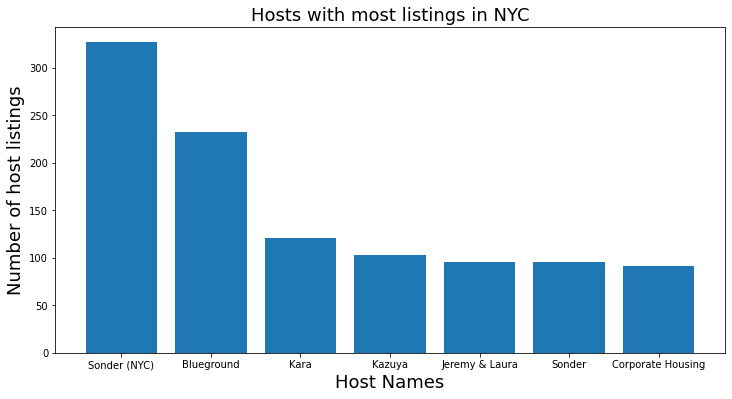

In [ ]:
# Visualizing the hosts with most listings.
# selecting top 10 host 
top_hosts=host_ar_rept.sort_values(by='calculated_host_listings_count', ascending=False).head(10)

plt.rcParams['figure.figsize'] = (12,6)
host_name = top_hosts['host_name']
host_lisitng = top_hosts['calculated_host_listings_count']
plt.bar(host_name,host_lisitng)
plt.title('Hosts with most listings in NYC',{'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Number of host listings',{'fontsize':18})
plt.show()

In [ ]:
# Number of Airbnb listed in each neighbourhood
df_rept=air_df2.groupby(['neighbourhood_group'])['id'].count().reset_index().rename(columns = {'id':'count'}).sort_values(by='count', ascending = False)
df_rept.head()

,neighbourhood_group,count
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


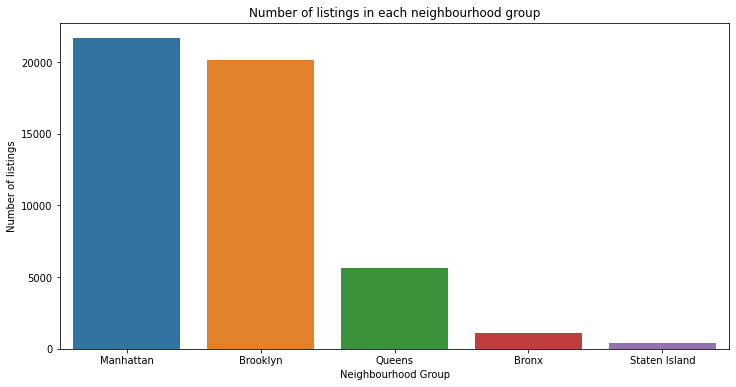

In [ ]:
# Visualizing the number of listings in each neighbourhood through bar plot
plt.rcParams['figure.figsize'] = (12,6)
ax = sns.barplot(x = df_rept['neighbourhood_group'], y = df_rept['count'])
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Number of listings')
ax.set_title('Number of listings in each neighbourhood group')
plt.show()


**As we can see most number of listings are from Manhattan created Sonder (NYC), Blueground, Michael, David**

**Map of Neighbourhood group**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


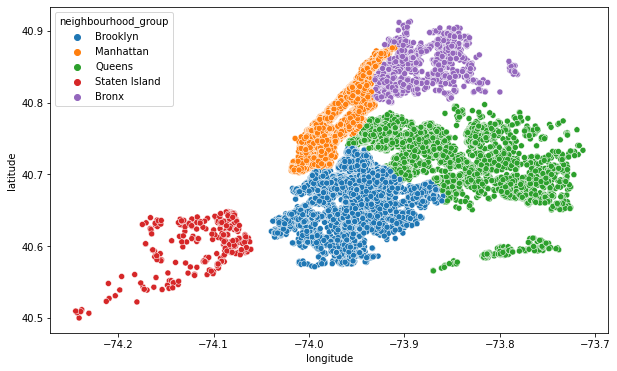

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(air_df2.longitude,air_df2.latitude,hue=air_df2.neighbourhood_group)
plt.ioff()

#**2. What can we learn from predictions? (ex: locations, prices, reviews, etc)**

In [ ]:
#Creating a Report neighbourhood has got maximum number of reviews
areas_review_rept = air_df2.groupby(['neighbourhood_group'])['number_of_reviews'].max()
areas_review_rept=areas_review_rept.reset_index()
print(areas_review_rept)

  neighbourhood_group  number_of_reviews
0               Bronx                321
1            Brooklyn                488
2           Manhattan                607
3              Queens                629
4       Staten Island                333


In [ ]:
areas_review_rept.columns

Index(['neighbourhood_group', 'number_of_reviews'], dtype='object')

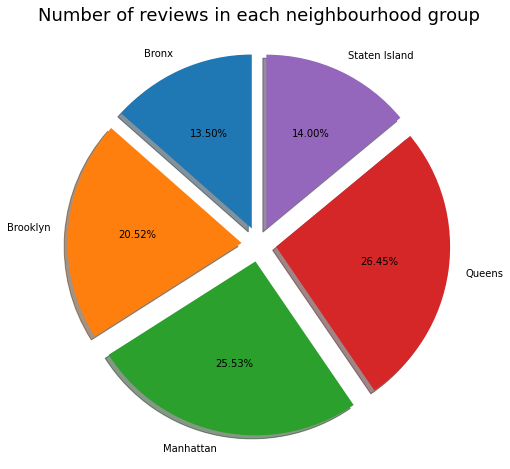

In [ ]:
# Visualising the number of reviews in each neighbourhood group through pie chart
plt.rcParams['figure.figsize'] = (13,8)
reviews = areas_review_rept['number_of_reviews']
plt.pie(reviews, labels = areas_review_rept['neighbourhood_group'], autopct ='%0.2f%%', startangle =90, explode = [0.1,0.1,0.1,0.1,0.1], shadow = True )
plt.title('Number of reviews in each neighbourhood group', {'fontsize': 18})
plt.show()

**Observation :** As per the Pie chart from above we can say Queens, Manhattan have majority of reviews which implies that people are enjoying to stay in these neighbourhoods. Also from these neighbourhoods majority revenue is generated for the company.

In [ ]:
#Creating a Report on number of Reviews vs Price

area_price = air_df2.groupby(['price'])['number_of_reviews'].max().reset_index()
area_price.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


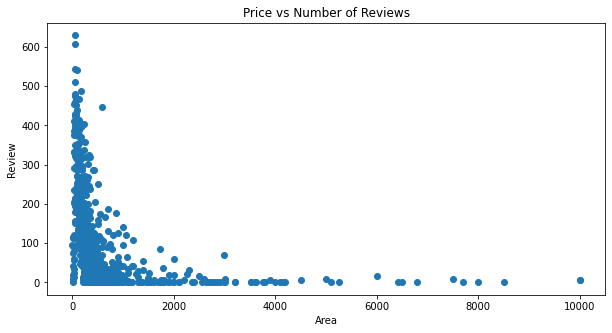

In [ ]:
Area = area_price['price']
Review = area_price['number_of_reviews']
fig = plt.figure(figsize = (10, 5))
 
# creating the scatter plot
plt.scatter(Area, Review)

plt.xlabel("Area")
plt.ylabel("Review")
plt.title("Price vs Number of Reviews")
plt.show()

After analysing the data & report we can say most the people like to stay where price is low then other location.

In [ ]:
# low quantile
q_low = air_df2['price'].quantile(0.10)
q_low
#high quantile
q_high = air_df2['price'].quantile(0.9)
q_high

269.0

####Looks like the 10th percentile is 49USD and the 90th percentile is 269USD. Since we are dealing with Airbnb listings, it is not uncommon for a few places to be much more expensive than others, especially luxurious ones.

####Given that we are going to perform calculations in our data and the mean can be skewed by outliers, let's go ahead and implement the above technique by removing the values that don't apply to the specified range – set between 49USD and 269USD.

In [ ]:
#removing the values below 10th percentile and above 90th percentile
airbnb_data_new = air_df2.drop(air_df2[air_df2['price']<q_low].index)
airbnb_data_new = air_df2.drop(air_df2[air_df2['price']>q_high].index)

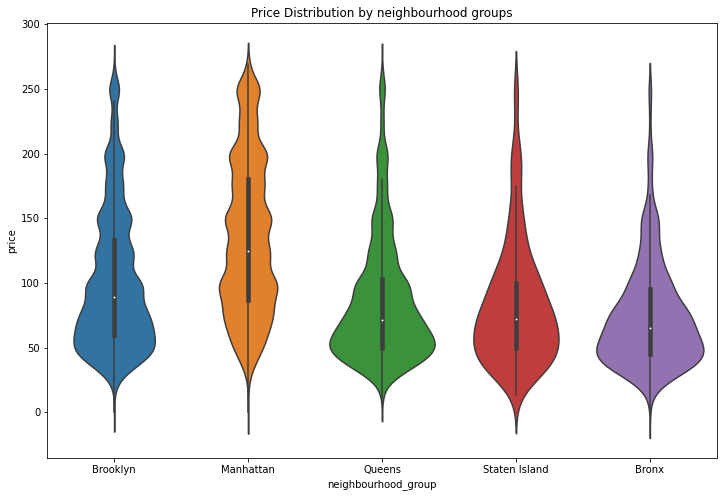

In [ ]:
# Now lets see the price distribution by neighbourhood gropus
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="neighbourhood_group", y="price", data=airbnb_data_new).set_title('Price Distribution by neighbourhood groups')
plt.show()

By looking at the violin plot, we can see that Manhattan has a higher price range and is the most expensive one. Brooklyn has the second-highest rental prices, while the Bronx appears as the most affordable one.

#**3.Which hosts are the busiest and why?**

In [ ]:
# Creating a Report on host name and reviews on it 
busy_hosts = air_df2.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max()
busy_hosts=busy_hosts.reset_index()
busy_hosts = busy_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)


In [ ]:
busy_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37766,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


Text(0, 0.5, 'Number of Reviews')

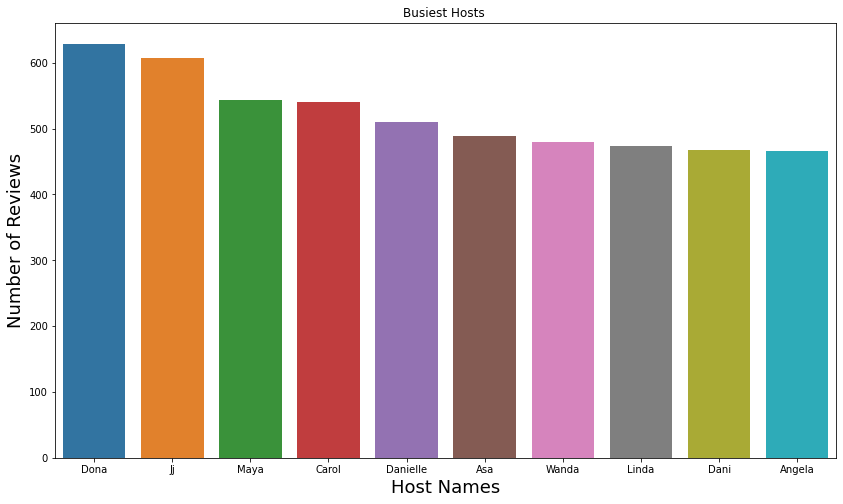

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=busy_hosts,x='host_name',y='number_of_reviews',ax=ax,capsize=.2)
ax.set(title='Busiest Hosts ')
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Number of Reviews',{'fontsize':18})

#Busiest hosts are:

1.   Dona
2.   Ji
3.   Maya
4.   Carol
5.   Danielle

Because these hosts listed room type as Entire home and Private room which is preferred by most number of people.

#**4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

In [ ]:
traffic_areas_rept = air_df2.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas_rept = traffic_areas_rept.sort_values(by='minimum_nights', ascending=False)
traffic_areas_rept.head(2)

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132


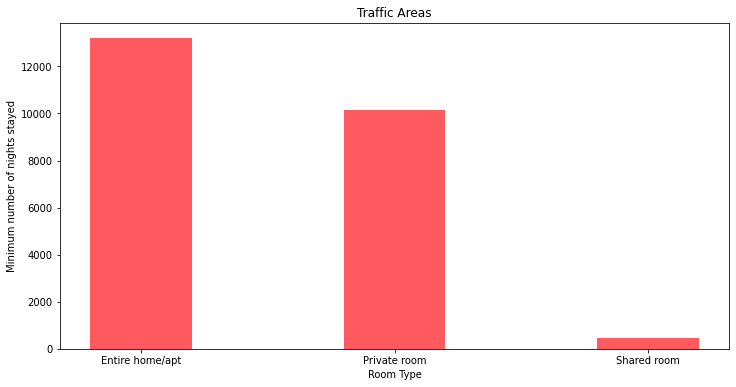

In [ ]:
Room_Category = traffic_areas_rept['room_type']
Stay = traffic_areas_rept['minimum_nights']

fig = plt.figure(figsize = (12, 6))
 
# creating the bar plot
plt.bar(Room_Category, Stay, color ='#FF5A5F',
        width = 0.4)
 
plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("Traffic Areas")
plt.show()

#From the Above Analysis We can Stay that People are preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens and people are preferring listings which are less in price.

**Key Findings:** 
1. Manhattan has most number of listings, followed by Brooklyn and Queens. Staten Island has least number of listings.
2. Manhattan and Brooklyn make up for 87% of listings available in NYC.
3. Brooklyn and Manhattan are most liked neighbourhood groups by people.
4. Queens has significantly less host listings than Manhattan. So, we should take enough steps to encourage host listings in Queens.
5. The maximum demand is for private rooms and enitre home/apartment. People are more interested in cheaper rentals.

**Conclusion:** 
###1. The people who prefer to stay in Entire home or  Apartment they are going to stay bit longer in that particular Neighbourhood only.
###2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.
###3. Most people prefer to pay less price.
###4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
###5. If people are not staying more then one night means they are travellers.